[(0, 0)]
[(1, 1)]
[(2, 1)]
[(0, 2)]
[(2, 2)]
[(2, 0)]
[(3, 1)]
[(4, 1)]
[(5, 2)]
[(4, 3)]
[(3, 4)]
[(2, 4)]
[(5, 0)]
[(1, 5)]
[(0, 4)]
[(0, 6)]
[(1, 7)]
[(6, 3)]
[(7, 4)]
[(6, 1)]
[(2, 7)]
[(3, 5)]
[(4, 6)]
[(5, 7)]
[(1, 0)]
[(0, 5)]
[(7, 1)]
[(5, 4)]
[(6, 4)]
[(3, 6)]
[(4, 4)]
[(3, 3)]
[(1, 2)]
[(7, 2)]
[(0, 3)]
[(5, 1)]
[(5, 6)]
[(6, 6)]
Find the shortest path to get from (0,0) to (7,7):
Optimal Route =  [(0, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (4, 3), (3, 4), (3, 5), (4, 6), (5, 7), (6, 6), (7, 7)]
Optimal Cost =   210


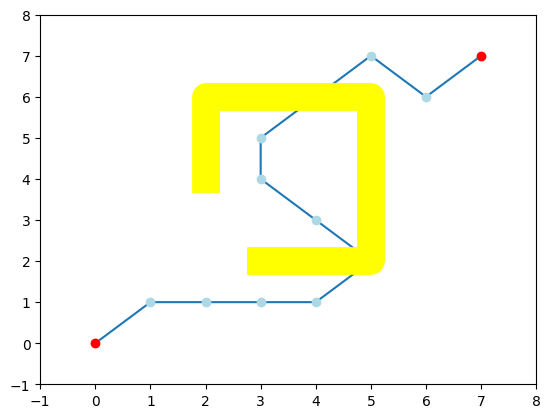

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 16 14:13:33 2020

@author: Yun-Hsuan Su (June 19, 2018), modified by Yana Sosnovskaya (July 2020)
"""

# ref: https://www.laurentluce.com/posts/solving-mazes-using-python-simple-recursivity-and-a-search/
# ref: http://code.activestate.com/recipes/577519-a-star-shortest-path-algorithm/

from __future__ import print_function

import matplotlib.pyplot as plt


class AStarGraph(object):
    # Define a class board like grid with two barriers

    def __init__(self):
        self.barriers = []
    # uncomment a line appropriate to your team number
    # for groups 1, 2, 3, 4 uncomment next line:
        self.barriers.append([(2, 4), (2, 5), (2, 6), (3, 6), (4, 6), (5, 6), (5, 5), (5, 4), (5, 3), (5, 2), (4, 2), (3, 2)])
    # for groups 5, 6, 7, 8, 9, 10 uncomment next line:
    # self.barriers.append([(2, 3), (1, 5), (2, 7), (3, 6), (4, 6), (5, 6), (5, 5), (5, 4), (5, 3), (5, 2), (4, 2), (3, 2)])

    def heuristic(self, start, goal):
        # Use Chebyshev distance heuristic if we can move one square either
        # adjacent or diagonal
        # https://lyfat.wordpress.com/2012/05/22/euclidean-vs-chebyshev-vs-manhattan-distance/

        current_heuristic = -1
        # TODO: -------------------------------------------------
        # you may be using: start[0], start[1], goal[0], goal[1], abs(), max(,), min(,)

        dx = abs(start[0] - goal[0])
        dy = abs(start[1] - goal[1])
        current_heuristic = max(dx, dy)
        # -------------------------------------------------------
        #print(current_heuristic)
        return current_heuristic

    def get_vertex_neighbours(self, pos):

        n = []
        # print(pos[0])
        # print(pos[1])
        # Moves allow link a chess king
        for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)]:
            x2 = pos[0] + dx
            y2 = pos[1] + dy
            if x2 < 0 or x2 > 7 or y2 < 0 or y2 > 7:
                continue
            n.append((x2, y2))
            #time.sleep(2)

        return n

    def move_cost(self, a, b):
        for barrier in self.barriers:
            if b in barrier:
                return 100  # Extremely high cost to enter barrier squares
        return 1  # Normal movement cost


def AStarSearch(start, end, graph):
    G = {}  # Actual movement cost to each position from the start position
    F = {}  # Estimated movement cost of start to end going via this position

    # Initialize starting values
    G[start] = 0
    F[start] = graph.heuristic(start, end)

    closedVertices = set()
    openVertices = set([start])  # {(0,0)}
    cameFrom = {}
    currentFscore = 7
    while len(openVertices) > 0:
        #print(openVertices)
        # Get the vertex in the open list with the lowest F score
        current = None


        # TODO:--------------------------------------------
        # Loop through each position in the openVertices list and set the current
        # to be the position with the lowest F score, and put its F score in the
        # currentFscore variable.
        #
        # shuffle the order:
        # (A) currentFscore = F[pos]
        # (B) current = pos
        # (C) if current is None or F[pos] < currentFscore:
        # (D) for pos in openVertices:
        #print(currentFscore[0])
        for pos in openVertices:
            current = pos
            #print(current)
            if current is None or F[pos] < currentFscore:
                currentFscore = F[pos]
                #print(currentFscore)
        # -------------------------------------------------

        # Check if we have reached the goal
        if current == end:
            # Retrace our route backward
            path = [current]
            while current in cameFrom:
                current = cameFrom[current]
                path.append(current)
            path.reverse()
            return path, F[end]  # Done!

        # TODO:--------------------------------------------
        # Mark the currente vertx das closed, an remove it from openVertices.
        # you may be using: openVertices, closedVertices, remove(), add(), current
        print([current])
        openVertices.remove(current)
        closedVertices.add(current)

        # -------------------------------------------------

        # Update scores for vertices near the current position
        for neighbour in graph.get_vertex_neighbours(current):
            if neighbour in closedVertices:
                continue  # We have already processed this node exhaustively
            candidateG = G[current] + graph.move_cost(current, neighbour)

            if neighbour not in openVertices:
                openVertices.add(neighbour)  # Discovered a new vertex
            elif candidateG >= G[neighbour]:
                continue  # This G score is worse than previously found

            cameFrom[neighbour] = current

            # TODO:--------------------------------------------
            # Adopt this G score
            G[neighbour] = candidateG
            H = graph.heuristic(neighbour, end)  # graph.heuristic(neighbour, start) or graph.heuristic(neighbour, end)
            F[neighbour] = G[neighbour] + H
    # -------------------------------------------------

    raise RuntimeError("A* failed to find a solution")


def draw_result(result_path, cost):
    plt.plot([v[0] for v in result_path], [v[1] for v in result_path])
    plt.plot([v[0] for v in result_path], [v[1] for v in result_path], 'o', color='lightblue')
    plt.plot([0, 7], [0, 7], 'o', color='red')
    for barrier in graph.barriers:
        plt.plot([v[0] for v in barrier], [v[1] for v in barrier], linewidth=20, color='yellow')
    plt.xlim(-1, 8)
    plt.ylim(-1, 8)
    plt.show()


def write_result(result_path, cost):
    print('Find the shortest path to get from (0,0) to (7,7):')
    print("Optimal Route = ", result_path)
    print("Optimal Cost =  ", cost)


if __name__ == "__main__":
    graph = AStarGraph()
    result_path, cost = AStarSearch((0, 0), (7, 7), graph)
    write_result(result_path, cost)
    draw_result(result_path, cost)


{(0, 0)}
{(0, 1), (1, 0), (1, 1)}
{(0, 1), (1, 2), (2, 0), (2, 2), (1, 0), (0, 2), (2, 1)}
{(3, 2), (1, 3), (2, 1), (2, 3), (1, 0), (0, 1), (1, 2), (3, 3), (3, 1), (2, 0), (0, 2)}
{(3, 2), (1, 3), (2, 1), (2, 3), (4, 2), (1, 0), (2, 4), (0, 1), (1, 2), (3, 1), (4, 4), (2, 0), (4, 3), (3, 4), (0, 2)}
{(3, 2), (1, 3), (5, 4), (4, 5), (2, 1), (2, 3), (4, 2), (1, 0), (2, 4), (3, 5), (0, 1), (1, 2), (5, 3), (5, 5), (3, 1), (2, 0), (4, 3), (3, 4), (0, 2)}
{(3, 2), (1, 3), (5, 4), (5, 6), (2, 1), (2, 3), (4, 2), (1, 0), (2, 4), (3, 5), (0, 1), (1, 2), (5, 3), (5, 5), (4, 6), (3, 1), (2, 0), (4, 3), (3, 6), (3, 4), (0, 2)}
{(3, 2), (1, 3), (5, 4), (2, 6), (5, 6), (2, 1), (2, 3), (4, 2), (1, 0), (2, 5), (2, 4), (0, 1), (1, 2), (5, 3), (5, 5), (4, 6), (3, 1), (2, 0), (4, 3), (3, 6), (3, 4), (0, 2)}
{(3, 2), (1, 3), (5, 4), (2, 6), (5, 6), (5, 2), (2, 1), (2, 3), (4, 2), (1, 0), (2, 5), (2, 4), (0, 1), (1, 2), (5, 3), (5, 5), (4, 6), (3, 1), (2, 0), (3, 6), (3, 4), (0, 2)}
{(3, 2), (1, 3), (5, 4)

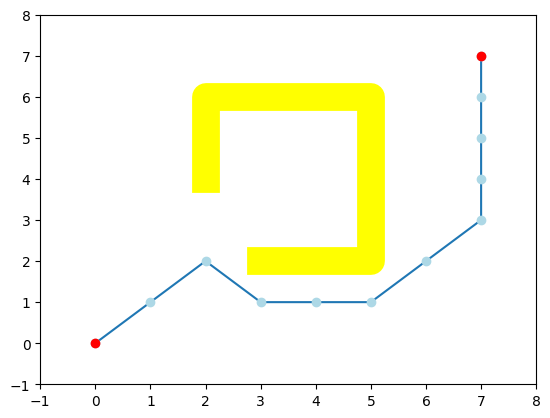

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 16 14:13:33 2020

@author: Yun-Hsuan Su (June 19, 2018), modified by Yana Sosnovskaya (July 2020)
"""

# ref: https://www.laurentluce.com/posts/solving-mazes-using-python-simple-recursivity-and-a-search/
# ref: http://code.activestate.com/recipes/577519-a-star-shortest-path-algorithm/

from __future__ import print_function
import matplotlib.pyplot as plt


# import heapq

class AStarGraph(object):
    # Define a class board like grid with two barriers
    def __init__(self):
        self.barriers = []
        # uncomment a line appropriate to your team number
        # for groups 1, 2, 3, 4 uncomment next line:
        self.barriers.append(
            [(2, 4), (2, 5), (2, 6), (3, 6), (4, 6), (5, 6), (5, 5), (5, 4), (5, 3), (5, 2), (4, 2), (3, 2)])

    def heuristic(self, start, goal):
        # Use Chebyshev distance heuristic if we can move one square either
        # adjacent or diagonal
        # https://lyfat.wordpress.com/2012/05/22/euclidean-vs-chebyshev-vs-manhattan-distance/

        current_heuristic = -1
        # TODO: -------------------------------------------------
        # you may be using: start[0], start[1], goal[0], goal[1], abs(), max(,), min(,)
        dx = abs(start[0] - goal[0])
        dy = abs(start[1] - goal[1])
        current_heuristic = dx + dy)
        # -------------------------------------------------------
        return current_heuristic

    def get_vertex_neighbours(self, pos):
        n = []
        # Moves allow link a chess king
        for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)]:
            x2 = pos[0] + dx
            y2 = pos[1] + dy
            if x2 < 0 or x2 > 7 or y2 < 0 or y2 > 7:
                continue
            n.append((x2, y2))
        return n

    def move_cost(self, a, b):
        for barrier in self.barriers:
            if b in barrier:
                return 100  # Extremely high cost to enter barrier squares
        return 1  # Normal movement cost


def AStarSearch(start, end, graph):
    G = {}  # Actual movement cost to each position from the start position
    F = {}  # Estimated movement cost of start to end going via this position

    # Initialize starting values
    G[start] = 0
    F[start] = graph.heuristic(start, end)

    closedVertices = set()
    openVertices = set([start])
    cameFrom = {}

    while len(openVertices) > 0:
        print(openVertices)
        # Get the vertex in the open list with the lowest F score
        current = None
        currentFscore = None

        # TODO:--------------------------------------------
        # Loop through each position in the openVertices list and set the current
        # to be the position with the lowest F score, and put its F score in the
        # currentFscore variable.
        #
        # shuffle the order:
        # (A) currentFscore = F[pos]
        # (B) current = pos
        # (C) if current is None or F[pos] < currentFscore:
        # (D) for pos in openVertices:
        currentFscore = 100
        for pos in openVertices:

            
            if current is None or F[pos] < currentFscore:
                current = pos
                currentFscore = F[pos]
                #print(currentFscore)
        # -------------------------------------------------

        # Check if we have reached the goal
        if current == end:
            # Retrace our route backward
            path = [current]
            while current in cameFrom:
                current = cameFrom[current]
                path.append(current)
            path.reverse()
            return path, F[end]  # Done!

        # TODO:--------------------------------------------
        # Mark the current vertex as closed, and remove it from openVertices.
        # you may be using: openVertices, closedVertices, remove(), add(), current
        openVertices.remove(current)
        closedVertices.add(current)
        # -------------------------------------------------

        # Update scores for vertices near the current position
        for neighbour in graph.get_vertex_neighbours(current):
            if neighbour in closedVertices:
                continue  # We have already processed this node exhaustively
            candidateG = G[current] + graph.move_cost(current, neighbour)

            if neighbour not in openVertices:
                openVertices.add(neighbour)  # Discovered a new vertex
            elif candidateG >= G[neighbour]:
                continue  # This G score is worse than previously found

            cameFrom[neighbour] = current

            # TODO:--------------------------------------------
            # Adopt this G score
            G[neighbour] = candidateG
            H = graph.heuristic(neighbour, end)  # graph.heuristic(neighbour, start) or graph.heuristic(neighbour, end)
            F[neighbour] = G[neighbour] + H
    # -------------------------------------------------

    raise RuntimeError("A* failed to find a solution")


def draw_result(result_path, cost):
    plt.plot([v[0] for v in result_path], [v[1] for v in result_path])
    plt.plot([v[0] for v in result_path], [v[1] for v in result_path], 'o', color='lightblue')
    plt.plot([0, 7], [0, 7], 'o', color='red')
    for barrier in graph.barriers:
        plt.plot([v[0] for v in barrier], [v[1] for v in barrier], linewidth=20, color='yellow')
    plt.xlim(-1, 8)
    plt.ylim(-1, 8)
    plt.show()


def write_result(result_path, cost):
    print('Find the shortest path to get from (0,0) to (7,7):')
    print("Optimal Route = ", result_path)
    print("Optimal Cost =  ", cost)


if __name__ == "__main__":
    graph = AStarGraph()
    result_path, cost = AStarSearch((0, 0), (7, 7), graph)
    write_result(result_path, cost)
    draw_result(result_path, cost)



In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

############### Part (a) ###############
# Task 1: read an image (you may use your own photo!), resize image
# *** TODO: read a color image using OpenCV imread ***
# *** TODO: print image shape using numpy.ndarray.shape ***
# *** TODO: change the size of the image to 320x240 using OpenCV resize ***
# *** TODO: print the resized image shape using numpy.ndarray.shape ***
img = cv.imread(https://cn.bing.com/images/search?view=detailV2&ccid=A6TpC4oo&id=18E0F0DCC4093907CF8FCA6D75617F54A0D9F10E&thid=OIP.A6TpC4oo3eikb3qt2pSVJwHaHa&mediaurl=https%3a%2f%2fpic.netbian.com%2fuploads%2fallimg%2f181103%2f203205-1541248325fd73.jpg&exph=1202&expw=1202&q=风景图片&simid=607986813124306549&FORM=IRPRST&ck=960C2CEA7FE687C73D50376A8CB9464E&selectedIndex=0&ajaxhist=0&ajaxserp=0) 
# Note: OpenCV imread() reads image as a NumPy array of size Height x Width x 3 with default parameters.
#       The order of color is BGR (blue, green, red).
#       To show image in commonly used color mode RGB, we need to convert image from BGR to RGB color mode.
#       We could also convert the image into other color modes. For example, RGB -> grayscale.
# *** TODO: convert the color space from BGR to RGB using OpenCV cvtColor ***
# *** TODO: convert the color space from BGR to grayscale using OpenCV cvtColor ***

# Task 2: display multiple images
plt.figure()
# *** TODO: display the RGB and grayscale image using matplotlib.pyplot.imshow ***
plt.show() 

# Task 3: save image
# *** TODO: save the grayscale image using OpenCV imwrite ***
########################################

############### Part (b) ###############
plt.figure()
# *** TODO: plot the histogram (16 bins) of the grayscale image using matplotlib.pyplot.hist ***
plt.show()

# *** TODO: adjust the brightness and contrast of the grayscale image using OpenCV convertScaleAbs ***
# *** You could choose any valid parameters for convertScaleAbs. *** 
# *** TODO: display the adjusted grayscale image and its histogram ***

# *** TODO: Generate the same adjusted image as convertScaleAbs without using any available functions ***
#increase the contrast and brightness

# *** TODO: Implement gamma correction without using any available functions ***
#increase the gamma

# *** TODO: Implement alpha-blending, which is a process to overlap two images through weighted sum. ***
# *** Let f and g be two grayscale images, the goal is to perform new_output = (1-alpha)*f+alpha*g with an alpha between 0 and 1. ***
########################################

SyntaxError: invalid syntax (<ipython-input-2-238a371d2780>, line 11)

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# *** TODO: Read a image in grayscale (you may use your own photo!) ***

# Step 1: Image denoising
# *** TODO: Apply Gaussian filter using OpenCV GaussianBlur and display the original and blurred image ***

# Step 2: Find the intensity gradient
# *** TODO: Calculate the intensity gradient G and direction theta. ***
# ***       It's better to normalize G to [0,255]. ***

# Step 3: Non-maximum suppression
def non_maximum_suppression(G,Theta):
    height, width = G.shape
    output = np.zeros_like(G) # initiate the non-maximum suppression result

    # loop on each point (ignore the first&last row and first&last column)
    for i in range(1,height-1):
        for j in range(1,width-1):
            # *** TODO: Find the two pixels adjacent to the target pixel ***
            
            # *** TODO: Decide if keep or suppress the target pixel ***
            
    return output

# *** TODO: Display the original gradient image and suppressed gradient image. ***

# Step 4: Apply double threshold to determine potential edges
# *** TODO: Generate a strong and a week edge map. ***

# *** TODO: Display the strong and week edge map. ***


# Step 5: Track edge by hysteresis
def track_edge(strong,weak):
    height, width = strong.shape
    output = np.zeros_like(strong) # initiate the final edge map

    # loop on each point (ignore the first&last row and first&last column)
    for i in range(1,height-1):
        for j in range(1,width-1):
            # *** TODO: Decide if the target pixel is edge or not. ***

    return output

# *** TODO: Display the final edge map. ***

IndentationError: expected an indented block (<ipython-input-3-28a448c5877c>, line 27)

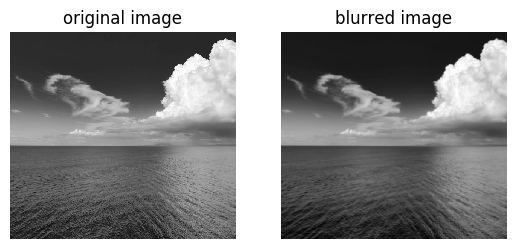

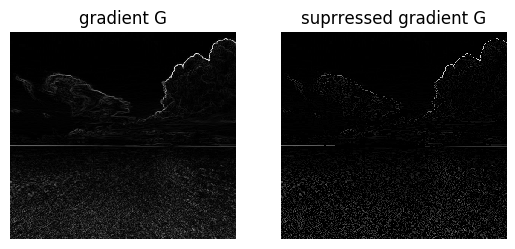

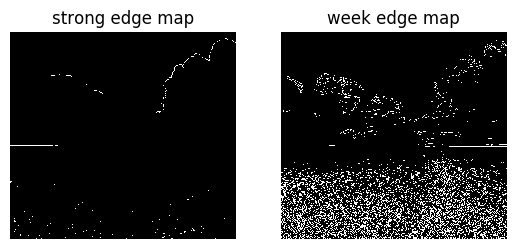

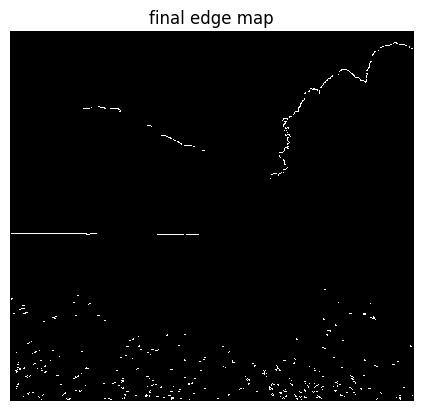

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# *** TODO: Read a image in grayscale (you may use your own photo!) ***
image = cv2.imread('b.jpg',0)
image = image[200:750,200:800]

# Step 1: Image denoising
# *** TODO: Apply Gaussian filter using OpenCV GaussianBlur and display the original and blurred image ***
image_blur = cv2.GaussianBlur(image,(5,5),0)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image, cmap="gray")
plt.title("original image")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(image_blur, cmap="gray")
plt.title("blurred image")
plt.axis('off')
plt.show()

# Step 2: Find the intensity gradient
# *** TODO: Calculate the intensity gradient G and direction theta. ***
# ***       It's better to normalize G to [0,255]. ***
# sobel filters
Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

# convolution
image = image.astype(np.float32)
Ix = ndimage.filters.convolve(image, Kx)
Iy = ndimage.filters.convolve(image, Ky)
G = np.sqrt(Ix**2 + Iy**2)
G = (G / np.max(G) * 255).astype(np.uint8)
theta = np.arctan2(Iy, Ix) * 180/np.pi # convert the angle from rad to degree

# Step 3: Non-maximum suppression
def non_maximum_suppression(G,Theta):
    height, width = G.shape
    output = np.zeros_like(G) # initiate the non-maximum suppression result

    # loop on each point (ignore the first&last row and first&last column)
    for i in range(1,height-1):
        for j in range(1,width-1):
            # *** TODO: Find the two pixels adjacent to the target pixel ***
            p = G[i,j]
            theta = Theta[i,j]
            if np.abs(theta) <= 22.5 or np.abs(theta) >= 157.5:
                p1 = G[i,j-1] 
                p2 = G[i,j+1] 
            elif (22.5 <= theta <= 67.5) or (-157.5 <= theta <= -112.5):
                p1 = G[i+1,j-1]
                p2 = G[i-1,j+1]
            elif 67.5 <= np.abs(theta) <=112.5:
                p1 = G[i-1,j]
                p2 = G[i+1,j]
            elif (112.5 <= theta <= 157.5) or (-67.5 <= theta <= -22.5):
                p1 = G[i-1,j-1]
                p2 = G[i+1,j+1]
            
            # *** TODO: Decide if keep or suppress the target pixel ***
            if p >= p1 and p >= p2:
                output[i,j] = p
    return output

sup_G = non_maximum_suppression(G,theta)  

# *** TODO: Display the original gradient image and suppressed gradient image. ***
plt.figure()
plt.subplot(1,2,1)
plt.imshow(G,cmap="gray")
plt.title('gradient G')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sup_G,cmap="gray")
plt.title('suprressed gradient G')
plt.axis('off')
plt.show()

# Step 4: Apply double threshold to determine potential edges
# *** TODO: Generate a strong and a week edge map. ***
threshold_low = 20
threshold_high = 80
strong_map = (sup_G>=threshold_high)*1.
weak_map = ((sup_G<threshold_high)&(sup_G>=threshold_low))*1.

# *** TODO: Display the strong and week edge map. ***
plt.figure()
plt.subplot(1,2,1)
plt.imshow(strong_map,cmap="gray")
plt.title('strong edge map')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(weak_map,cmap="gray")
plt.title('week edge map')
plt.axis('off')
plt.show()

# Step 5: Track edge by hysteresis
def track_edge(strong,weak):
    height, width = strong.shape
    output = np.zeros_like(strong) # initiate the final edge map

    # loop on each point (ignore the first&last row and first&last column)
    for i in range(1,height-1):
        for j in range(1,width-1):
            # *** TODO: Decide if the target pixel is edge or not. ***
            if strong[i,j] == 1:
                output[i,j] = 255
            elif weak[i,j] == 1 and np.sum(strong[i-1:i+2,j-1:j+2])>0:
                output[i,j] = 255
    return output
final_edge_map = track_edge(strong_map,weak_map)

# *** TODO: Display the final edge map. ***
plt.figure()
plt.imshow(final_edge_map,cmap="gray")
plt.title('final edge map')
plt.axis('off')
plt.show()

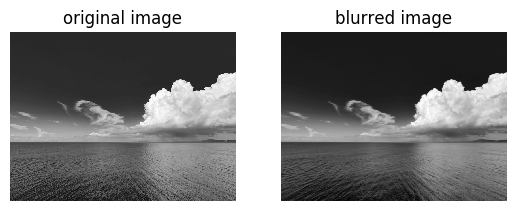

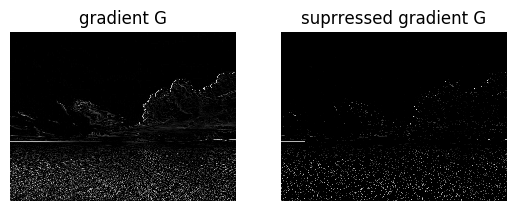

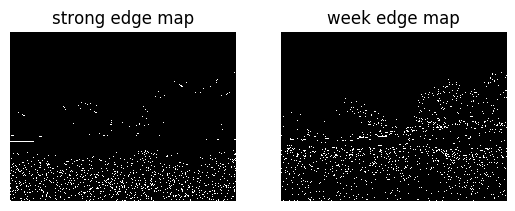

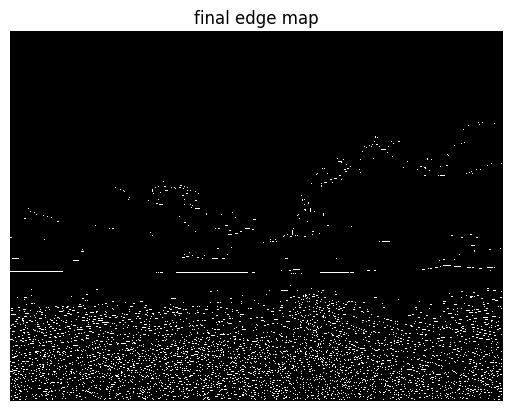

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import math

# *** TODO: Read a image in grayscale (you may use your own photo!) ***
image = cv2.imread("b.jpg", 0)
# image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# Step 1: Image denoising
# *** TODO: Apply Gaussian filter using OpenCV GaussianBlur and display the original and blurred image ***
image_blur = cv2.GaussianBlur(image, (5, 5), 0)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("original image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image_blur, cmap="gray")
plt.title("blurred image")
plt.axis('off')
plt.show()

# Step 2: Find the intensity gradient
# *** TODO: Calculate the intensity gradient G and direction theta. ***
# ***       It's better to normalize G to [0,255]. ***

# sober算子
S_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
S_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
height_0,weight_0 = image.shape

# convolution
# border
img2 = cv2.copyMakeBorder(image,1,1,1,1,cv2.BORDER_REPLICATE)
tmp = img2.copy().astype(np.float)
I1 = np.zeros((height_0+2,weight_0+2), dtype=np.float)
I2 = np.zeros((height_0+2,weight_0+2), dtype=np.float)
for h in range(height_0):
    for w in range(weight_0):
        I1[h,w] = np.sum(S_x*tmp[h:h+3, w:w+3])
        I2[h,w] = np.sum(S_y*tmp[h:h+3, w:w+3])
I1 = np.clip(I1, 0, 255)
I2 = np.clip(I2, 0, 255)
G = np.sqrt(I1*I1+I2*I2)


# Step 3: Non-maximum suppression
def non_maximum_suppression(G):
    I_copy = np.zeros(G.shape)
    G_plus = cv2.copyMakeBorder(G, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
    anchor = np.where(G_plus != 0)

    for i in range(len(anchor[0])):
        x = anchor[0][i]
        y = anchor[1][i]
        alter_point = G[x, y]
        g1 = G[x - 1, y - 1]
        g2 = G[x + 1, y - 1]
        g3 = G[x - 1, y + 1]
        g4 = G[x + 1, y + 1]
        if g1 < alter_point and g2 < alter_point and g3 < alter_point and g4 < alter_point:
            I_copy[x, y] = alter_point

    # img_uint8 = I_copy.astype(np.uint8)
    return I_copy
sup_G = non_maximum_suppression(G)
# *** TODO: Display the original gradient image and suppressed gradient image. ***
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(G, cmap="gray")
plt.title('gradient G')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(sup_G, cmap="gray")
plt.title('suprressed gradient G')
plt.axis('off')
plt.show()

# Step 4: Apply double threshold to determine potential edges
# *** TODO: Generate a strong and a week edge map. ***
threshold_low = 20
threshold_high = 80
strong_map = (sup_G >= threshold_high) * 1.
weak_map = ((sup_G < threshold_high) & (sup_G >= threshold_low)) * 1.
# *** TODO: Display the strong and week edge map. ***
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(strong_map, cmap="gray")
plt.title('strong edge map')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(weak_map, cmap="gray")
plt.title('week edge map')
plt.axis('off')
plt.show()


# Step 5: Track edge by hysteresis
def track_edge(strong, weak):
    height, width = strong.shape
    output = np.zeros_like(strong)  # initiate the final edge map

    # loop on each point (ignore the first&last row and first&last column)
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # *** TODO: Decide if the target pixel is edge or not. ***
            if strong[i, j] == 1:
                output[i, j] = 255
            elif weak[i, j] == 1 and np.sum(strong[i - 1:i + 2, j - 1:j + 2]) > 0:
                output[i, j] = 255
    return output

final_edge_map = track_edge(strong_map, weak_map)

# *** TODO: Display the final edge map. ***
plt.figure()
plt.imshow(final_edge_map, cmap="gray")
plt.title('final edge map')
plt.axis('off')
plt.show()

In [28]:
1 

1